<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/MLpolar0604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving polarml06025.py to polarml06025.py


In [11]:
####################################################################
#06/05/25  at 1 AM
#Rewrte now
#older version rerunning it plots but has problem with SCL decoder an donly one list size get plotted.
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import logging
import traceback
import pandas as pd
import logging
import traceback
# Configure logging at the DEBUG level
logging.basicConfig(level=logging.DEBUG)

# Rest of your imports and code follow
# %% [markdown]
# # Making the Most of your Colab Subscription
# ...
# Configuration
BLOCK_LENGTH = 128
INFO_BITS = 64
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
NUM_SAMPLES_TRAIN = 10000
NUM_TRIALS_PERF = 1000
SNR_RANGE_AWGN = np.linspace(0, 5, 11)
LIST_SIZES = [1, 8, 16]


# Helper Functions
# Removed unexpected indent before the function definition
def bit_reversal_permutation(n):
    """
    Generates the bit-reversal permutation for a block length N = 2^n.
    """
    N = 2**n
    permutation = np.zeros(N, dtype=int)
    for i in range(N):
        binary_i = bin(i)[2:].zfill(n)
        reversed_binary_i = binary_i[::-1]
        permutation[i] = int(reversed_binary_i, 2)
    return permutation

# Rest of your code follows:
# Define Classes and Functions

    # Define Classes and Functions

####################################################
# Define Classes and Functions

class PolarCodeGenerator:
    def __init__(self, N, K, crc_type='CRC-7'):
        self.N = N  # Should be 128 (2^7) for N=128
        self.n = int(np.log2(N)) # Calculate n from N
        if 2**self.n != N:
             raise ValueError("N must be a power of 2")
        self.K = K
        self.R = K / N
        self.crc_type = crc_type

        self.crc_polynomials = {
            'CRC-7': (np.array([1, 0, 0, 1, 1, 0, 0, 1]), 7)
        }
        self.K_crc = self.K + (self.crc_polynomials[self.crc_type][1] if crc_type in self.crc_polynomials else 0)

        # Determine the frozen and information sets using GA approximation
        # This will replace the simplified indexing from before
        self.frozen_set, self.info_set = self._get_frozen_and_info_sets()


    def generate_info_bits(self):
        return np.random.randint(2, size=self.K)

    def polar_encode(self, info_bits):
        # Step 1: Compute CRC and append to info bits
        info_bits_with_crc = self.compute_crc(info_bits)

        if len(info_bits_with_crc) != self.K_crc:
             raise ValueError(f"Length of info_bits_with_crc ({len(info_bits_with_crc)}) does not match K_crc ({self.K_crc})")

        # Step 2: Create the input block u of length N
        u = np.zeros(self.N, dtype=int)
        # Place info+CRC bits at the information indices
        u[list(self.info_set)] = info_bits_with_crc

        # Step 3: Perform the polar transform (encoding)
        codeword = self._polar_transform(u)

        # Step 4: Apply bit-reversal permutation (optional for encoding, required for decoding)
        # It's more common to apply bit reversal to the LLRs at the decoder input
        # rather than to the codeword itself for encoding.
        # However, if your decoder expects a bit-reversed codeword, you'd apply it here.
        # For typical SCL decoding, you apply bit reversal to the received LLRs.
        # Let's skip applying bit reversal to the codeword for now as it's
        # usually handled on the received LLRs.

        return codeword

    def _polar_transform(self, u):
        """
        Performs the polar transform (encoding) on the input block u.
        This is a recursive implementation of the polar transform.
        """
        N = len(u)
        if N == 1:
            return u
        else:
            half_N = N // 2
            u_upper = u[:half_N]
            u_lower = u[half_N:]

            # Recursive calls for the two halves
            x_upper = self._polar_transform(u_upper)
            x_lower = self._polar_transform(u_lower)

            # Combine the results
            codeword = np.zeros(N, dtype=int)
            codeword[:half_N] = (x_upper + x_lower) % 2
            codeword[half_N:] = x_lower % 2
            return codeword


    def compute_crc(self, info_bits):
        # ... (your existing compute_crc method) ...
        if self.crc_type not in self.crc_polynomials:
            return info_bits # No CRC applied

        polynomial, length = self.crc_polynomials[self.crc_type]
        data_for_crc = np.copy(info_bits)
        crc_bits = self.crc(data_for_crc, polynomial, length)
        return np.concatenate((info_bits, crc_bits))

    def crc(self, data, polynomial, length):
         # ... (your existing crc method) ...
        data = np.copy(data)
        data = np.concatenate((data, np.zeros(length, dtype=int)))
        polynomial = np.array(polynomial)

        if len(polynomial) != length + 1:
           raise ValueError("CRC polynomial length mismatch.")

        for i in range(len(data) - length):
            if data[i] == 1:
                data[i:i+length+1] ^= polynomial
        return data[-length:]

    def _get_frozen_and_info_sets(self):
        """
        Determines the frozen and information sets based on channel reliability
        using the Gaussian Approximation (GA).
        """
        # Initial channel capacities (for BEC, you'd use erasure prob)
        # For AWGN, the concept of channel capacity is related to mutual information.
        # Using GA, we approximate the reliability of synthesized channels.

        # This is a simplified GA approach. More accurate methods exist.
        reliabilities = [0.5] * self.N # Initial reliability for N independent channels

        # Simulate the channel combining process n times
        for s in range(self.n):
            next_reliabilities = [0.0] * self.N
            for j in range(self.N // 2):
                # Combine channels using the polar kernel rules
                # For GA, the reliability update rules are:
                # C(W + W') = f(C(W), C(W'))
                # C(W') = g(C(W), C(W')) where the 'g' here is different from the decoding 'g'

                # This is a simplified representation. The actual GA calculation
                # involves approximating the Bhattacharyya parameter or mutual information.
                # A common approximation for AWGN using variance:
                # Var(W_f) approx Var(W_1) + Var(W_2)  (sum of variances)
                # Var(W_g) approx 2 * Var(W_1) + 2 * Var(W_2) (roughly double the sum)

                # A more practical approach for ordering is based on the indices
                # and their corresponding channel merging.
                # The indices can be ordered based on their 'weights' or the number of 1s
                # in their binary representation. The channels with more 1s are generally
                # more reliable.

                # Let's use a simplified reliability ordering based on a known pattern
                # or a precomputed reliability sequence for AWGN.
                # For a block length N, the reliability sequence can be precomputed
                # or generated based on the bit-reversal permutation and recursive merging.

                # A common method is to use the indices ordered by the number of 1s
                # in their binary representation, then by value.
                # For N=128 (n=7), the indices with more 1s are more reliable.

                # Let's use a predefined reliability order (this needs to be accurate
                # for the given N and channel).
                # Generating the reliability order based on the recursive structure:
                def get_reliability_order(n):
                    if n == 0:
                        return [0]
                    else:
                        prev_order = get_reliability_order(n - 1)
                        N_half = 2**(n-1)
                        order = []
                        for i in prev_order:
                            order.append(2 * i)
                        for i in prev_order:
                            order.append(2 * i + 1)
                        return order

                reliability_order = get_reliability_order(self.n)

        # The reliability order gives the indices from least reliable to most reliable.
        # We need the indices from most reliable to least reliable to select
        # the K_crc most reliable channels for information bits.
        ordered_indices = np.argsort(reliability_order) # Least reliable to most reliable
        most_reliable_indices = ordered_indices[::-1] # Most reliable to least reliable

        # Select the K_crc most reliable indices for information bits
        info_indices = sorted(most_reliable_indices[:self.K_crc])

        # The remaining indices are the frozen bits
        frozen_indices = sorted(list(set(range(self.N)) - set(info_indices)))

        return set(frozen_indices), set(info_indices)
##############################################
#add data base generation file






        # Step 2: Create a placeholder codeword of length N (all zeros initially)
        codeword = np.zeros(self.N, dtype=int)

        # Step 3: Place the info_bits_with_crc into the "information" indices
        # This is a simplified placement - NOT the actual polar encoding transformation
        # In real polar encoding, there's a transformation based on the generator matrix.
        if len(info_bits_with_crc) > len(self.info_set): # Changed from self.info_indices to self.info_set
             raise ValueError("Number of info+CRC bits exceeds the allocated info indices.")
        # Use list(self.info_set) to access elements by index if needed, or directly use self.info_set for assignment if it's a numpy array of indices
        codeword[list(self.info_set)] = info_bits_with_crc # Ensure info_set is used correctly


        # Step 4: (In real polar encoding) Calculate the bits for the frozen channels.
        # In this simplified version, the frozen bits are just left as zeros.
        # In a real polar code, these are determined by the encoding process.

        # Step 5: (In real polar encoding) Apply bit-reversal permutation.
        # Skipping for this simplified version.


        # The output is a codeword of length N
        return codeword

    def compute_crc(self, info_bits):
        if self.crc_type not in self.crc_polynomials:
            return info_bits # No CRC applied

        polynomial, length = self.crc_polynomials[self.crc_type]
        # Ensure data is a mutable copy to avoid modifying the original info_bits
        data_for_crc = np.copy(info_bits)
        crc_bits = self.crc(data_for_crc, polynomial, length)
        return np.concatenate((info_bits, crc_bits))

    def crc(self, data, polynomial, length):
        # Debugging statements - keep if needed
        # print(f"CRC polynomial shape in crc function: {polynomial.shape if isinstance(polynomial, np.ndarray) else len(polynomial)}")
        # print(f"CRC length in crc function: {length}")
        # Ensure data is a mutable copy
        data = np.copy(data)
        # Append zeros for CRC calculation
        data = np.concatenate((data, np.zeros(length, dtype=int)))
        # Convert polynomial to a numpy array if it's a list
        polynomial = np.array(polynomial)

        # Ensure polynomial is the correct length for XOR operation
        if len(polynomial) != length + 1:
           raise ValueError("CRC polynomial length mismatch.")

        for i in range(len(data) - length):
            if data[i] == 1:
                # Perform XOR operation using the correct-length polynomial directly
                data[i:i+length+1] ^= polynomial # Use polynomial here, not padded_polynomial
        return data[-length:]


################################################




####################################
class EnhancedRNNDecoder(nn.Module):
    def __init__(self, input_size, output_size):
        super(EnhancedRNNDecoder, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Optional: Keep the unsqueeze/view logic if needed for input shaping
        if x.dim() == 1:
            x = x.unsqueeze(0)
        if x.dim() > 2:
            x = x.view(x.size(0), -1)

        # Pass the input directly to the sequential model
        return self.model(x)
################################################
#AWGN BPSK
class EnhancedChannelSimulator:
    def __init__(self, channel_type='AWGN'):
        self.channel_type = channel_type

    def simulate(self, signal, snr_db):
        if self.channel_type == 'AWGN':
            snr_linear = 10 ** (snr_db / 10)
            noise_std = np.sqrt(1 / (2 * snr_linear))
            noise = noise_std * np.random.randn(*signal.shape)
            return signal + noise
###############################################

def bpsk_modulate(bits):
    return 2 * bits - 1  # Convert 0 to -1 and 1 to 1
# Placeholder class for training model

# Dataset Preparation Function
def prepare_polar_dataset(polar_code_gen, num_samples, snr_db=5, channel_type='AWGN'):
    channel_simulator = EnhancedChannelSimulator(channel_type=channel_type)
    X, y = [], []

    for _ in range(num_samples):
        info_bits = polar_code_gen.generate_info_bits()
        encoded_signal = polar_code_gen.polar_encode(info_bits)
        modulated_signal = bpsk_modulate(encoded_signal)
        received_signal = channel_simulator.simulate(modulated_signal, snr_db)
        X.append(received_signal)
        y.append(info_bits)

    return np.array(X), np.array(y)
########################################################
#Latest DecoderTrainer

class DecoderTrainer:
    def __init__(self, model, learning_rate):
        self.model = model
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    def train(self, X_train, y_train, X_val=None, y_val=None, epochs=50, batch_size=32):
        dataset = torch.utils.data.TensorDataset(X_train, y_train)
        loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            epoch_loss = 0
            self.model.train()

            for X_batch, y_batch in loader:
                X_batch = X_batch.view(-1, BLOCK_LENGTH)  # Ensure correct shape
                print("X_batch shape:", X_batch.shape)  # Debugging statement

                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()

            train_loss = epoch_loss / len(loader)
            train_losses.append(train_loss)
            logging.info(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

            if X_val is not None and y_val is not None:
                self.model.eval()
                with torch.no_grad():
                    val_output = self.model(X_val.view(-1, BLOCK_LENGTH))
                    val_loss = self.criterion(val_output, y_val).item()
                    val_losses.append(val_loss)
                    logging.info(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss:.4f}")

        return train_losses, val_losses if X_val is not None else None
########################################################


#########################################################



def save_dataset_to_csv(X, y, filename='dataset.csv'):
    data = np.hstack((X, y))
    columns = [f'received_{i}' for i in range(X.shape[1])] + [f'bit_{j}' for j in range(y.shape[1])]
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(filename, index=False)
    logging.info(f"Dataset saved to {filename}")
##############################################


##################################################
class SCLDecoder:
    def __init__(self, N, K, list_size, crc_poly=None):
        self.N = N
        self.K = K
        self.list_size = list_size
        self.crc_poly = crc_poly
        self.paths = [[] for _ in range(list_size)]
        self.path_metrics = [0.0] * list_size
        self.frozen_set = self._get_frozen_set()
        self.info_set = sorted(list(set(range(N)) - set(self.frozen_set)))

        self.llrs = None
        self.hard_decisions = None

        if crc_poly:
            if isinstance(crc_poly, tuple) and len(crc_poly) == 2:
                self._crc_polynomial = np.array(crc_poly[0], dtype=int)
                self._crc_length = crc_poly[1]
            else:
                raise ValueError("crc_poly should be a tuple (polynomial, length)")
        else:
            self._crc_polynomial = None
            self._crc_length = 0

    def _get_frozen_set(self):
        # This should be determined by the channel and polar code construction
        return set(range(self.K, self.N))

    def decode(self, received_llrs):
        self.llrs = received_llrs
        self.hard_decisions = [np.zeros(self.N, dtype=int) for _ in range(self.list_size)]
        self.paths = [[] for _ in range(self.list_size)]
        self.path_metrics = [0.0] * self.list_size

        self._recursive_decode(0, range(self.list_size))

        # --- Path Selection with CRC (if enabled) ---
        best_path_index = -1
        min_metric = float('inf')

        for path_index in range(self.list_size):
            decoded_info_bits = self.hard_decisions[path_index][self.info_set]

            if self.crc_poly:
                computed_crc = self._compute_crc_for_info_bits(decoded_info_bits)
                # Placeholder CRC check - replace with actual comparison
                is_valid_path = True

                if is_valid_path and self.path_metrics[path_index] < min_metric:
                    min_metric = self.path_metrics[path_index]
                    best_path_index = path_index
            else:
                if self.path_metrics[path_index] < min_metric:
                    min_metric = self.path_metrics[path_index]
                    best_path_index = path_index

        if best_path_index == -1:
            best_path_index = np.argmin(self.path_metrics)

        decoded_info_bits = self.hard_decisions[best_path_index][self.info_set]
        original_info_bit_indices_in_info_set = range(self.K)
        decoded_original_info_bits = decoded_info_bits[original_info_bit_indices_in_info_set]

        return decoded_original_info_bits


    def _f(self, L1, L2):
        """
        The f function for combining LLRs (corresponding to a check node operation).
        Approximation for numerical stability: min(|L1|, |L2|) * sign(L1) * sign(L2)
        """
        return np.sign(L1) * np.sign(L2) * np.min(np.abs(L1), np.abs(L2))

    def _g(self, L1, L2, u1):
        """
        The g function for combining LLRs and a previously decoded bit (u1)
        (corresponding to a bit node operation).
        """
        # u1 is a hard decision (0 or 1)
        # The operation is L2 + (1 - 2*u1) * L1
        return L2 + (1 - 2 * u1) * L1

    def _recursive_decode(self, bit_index, active_paths):
        # This is a placeholder for the recursive SCL decoding function.
        # You will need to implement the actual recursive structure,
        # LLR calculations using _f and _g, path extension, and pruning here.
        pass # Replace with your SCL decoding logic

    def _compute_crc_for_info_bits(self, info_bits):
        """
        Computes the CRC for a given sequence of information bits.
        """
        if self._crc_polynomial is None or self._crc_length == 0:
            return np.array([], dtype=int) # No CRC configured

        data = np.copy(info_bits)
        data = np.concatenate((data, np.zeros(self._crc_length, dtype=int)))
        polynomial = self._crc_polynomial

        if len(polynomial) != self._crc_length + 1:
           raise ValueError("CRC polynomial length mismatch in SCLDecoder.")

        for i in range(len(data) - self._crc_length):
            if data[i] == 1:
                data[i:i+self._crc_length+1] ^= polynomial
        return data[-self._crc_length:]


###############################################


def run_scl_decoder(polar_code_gen, snr_range, list_size, channel_type, num_trials):
    results = []
    for snr_db in snr_range:
        # Note: prepare_polar_dataset generates X and y based on the code *before* channel simulation
        # The SCL decoder expects LLRs (Log-Likelihood Ratios) as input, which are derived
        # from the received signal after channel simulation.
        # You will need to simulate the channel and convert the received signal to LLRs
        # before passing it to the SCL decoder's decode method.

        channel_simulator = EnhancedChannelSimulator(channel_type=channel_type)
        decoder = SCLDecoder(N=polar_code_gen.N, K=polar_code_gen.K, list_size=list_size) # CRC needs to be passed here if used

        total_bit_errors = 0
        total_block_errors = 0

        for _ in range(num_trials):
            info_bits = polar_code_gen.generate_info_bits()
            encoded_codeword = polar_code_gen.polar_encode(info_bits) # Get the actual encoded codeword
            modulated_signal = bpsk_modulate(encoded_codeword)
            received_signal = channel_simulator.simulate(modulated_signal, snr_db)

            # Convert received signal to LLRs (Log-Likelihood Ratios)
            # For BPSK in AWGN, LLR = (2 * y) / sigma^2
            # noise_std = np.sqrt(1 / (2 * 10**(snr_db / 10)))  # From AWGN simulator
            # sigma_sq = noise_std**2
            # received_llrs = (2 * received_signal) / sigma_sq
            # A simpler LLR calculation for BPSK with unit energy symbols and noise variance sigma^2 is 2*y/sigma^2.
            # Given our AWGN simulator uses noise_std = sqrt(1 / (2 * snr_linear)),
            # sigma_sq = 1 / (2 * snr_linear).
            # LLR = 2 * received_signal / (1 / (2 * snr_linear)) = 4 * snr_linear * received_signal.
            # However, the standard LLR for BPSK in AWGN where signal is +-1 is often simplified or assumed to be proportional to the received signal itself, or scaled by Es/N0.
            # Let's use a common form: LLR = (2 * Amplitude * received_signal) / noise_variance. Assuming Amplitude=1.
            # noise_variance = 1 / (2 * (10**(snr_db/10)))
            # received_llrs = (2 * 1 * received_signal) / noise_variance # This seems more standard

            # A simpler way to think about LLRs for BPSK in AWGN where signal points are -1 and +1:
            # LLR(x_i) = log(P(y_i | x_i = +1) / P(y_i | x_i = -1))
            # Assuming Gaussian noise N(0, sigma^2), P(y_i | x_i) is Gaussian PDF.
            # LLR = 2 * y_i / sigma^2 where sigma^2 = N0/2.
            # SNR = Es / N0. For BPSK with Es=1, SNR = 1 / N0. So N0 = 1/SNR.
            # sigma^2 = (1/SNR) / 2 = 1 / (2 * SNR).
            # LLR = 2 * y_i / (1 / (2 * SNR)) = 4 * SNR * y_i.
            # SNR in linear scale = 10^(snr_db/10).
            snr_linear = 10**(snr_db/10)
            received_llrs = 4 * snr_linear * received_signal # Correct LLR calculation for BPSK

            decoded_info_bits = decoder.decode(received_llrs) # SCL decoder takes LLRs

            total_bit_errors += np.sum(info_bits != decoded_info_bits)
            total_block_errors += np.any(info_bits != decoded_info_bits)

        ber = total_bit_errors / (num_trials * polar_code_gen.K)
        bler = total_block_errors / num_trials

        results.append({'SNR': snr_db, 'BER': ber, 'BLER': bler})
        print(f"SCL Decoder - SNR: {snr_db:.1f} dB, List Size: {list_size}, BER: {ber:.4f}, BLER: {bler:.4f}")
    return results

#############################
#Performance comparison
def performance_comparison(rnn_trainer, polar_code_gen, snr_range, channel_type, list_sizes, num_trials):
    results = {'SNR': snr_range, 'BER_RNN': [], 'BLER_RNN': []}
    scl_results = {size: [] for size in list_sizes} # Dictionary to store SCL results per list size

    channel_simulator = EnhancedChannelSimulator(channel_type)

    for snr in snr_range:
        rnn_bit_errors = 0
        rnn_block_errors = 0
        scl_bit_errors = {size: 0 for size in list_sizes}
        scl_block_errors = {size: 0 for size in list_sizes}

        # Initialize SCL decoders for each list size
        scl_decoders = {size: SCLDecoder(N=polar_code_gen.N, K=polar_code_gen.K, list_size=size) for size in list_sizes}


        for _ in range(num_trials):
            info_bits = polar_code_gen.generate_info_bits()
            encoded_codeword = polar_code_gen.polar_encode(info_bits) # Get the actual encoded codeword
            modulated_signal = bpsk_modulate(encoded_codeword)
            simulated_signal = channel_simulator.simulate(modulated_signal, snr)

            # RNN decoding
            rnn_input = torch.FloatTensor(simulated_signal)
            # Reshape the input to match the model's expected input size
            rnn_input = rnn_input.view(1, BLOCK_LENGTH) # Reshape to [1, 128]


            rnn_output_prob = rnn_trainer.model(rnn_input).detach().numpy()
            # Apply thresholding to get hard decisions (0 or 1)
            rnn_output = (rnn_output_prob > 0.5).astype(int)


            # Ensure rnn_output shape matches info_bits shape before comparison
            # RNN output should be of shape (1, INFO_BITS)
            rnn_output = rnn_output.squeeze() # Remove the batch dimension if it exists

            rnn_bit_errors += np.sum(info_bits != rnn_output)
            rnn_block_errors += np.any(info_bits != rnn_output)

            # SCL decoding
            # Convert received signal to LLRs for SCL decoder
            snr_linear = 10**(snr/10)
            received_llrs = 4 * snr_linear * simulated_signal # Correct LLR calculation for BPSK

            for size in list_sizes:
                # SCL decoder expects LLRs as input
                scl_output = scl_decoders[size].decode(received_llrs) # SCL decoder takes LLRs

                # Ensure scl_output shape matches info_bits shape before comparison
                # SCL decoder should return info bits of shape (K,)
                scl_bit_errors[size] += np.sum(info_bits != scl_output)
                scl_block_errors[size] += np.any(info_bits != scl_output)

        # Calculate BER and BLER for the current SNR
        results['BER_RNN'].append(rnn_bit_errors / (num_trials * INFO_BITS))
        results['BLER_RNN'].append(rnn_block_errors / num_trials)

        for size in list_sizes:
            scl_results[size].append({
                'SNR': snr,
                'BER': scl_bit_errors[size] / (num_trials * INFO_BITS),
                'BLER': scl_block_errors[size] / num_trials
            })
        print(f"Finished SNR: {snr:.1f} dB for all decoders.")

    return results, scl_results # Return both dictionaries


##############################
#Plotting functions
##############################
#Plotting functions

def plot_training_validation(train_losses, val_losses):
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label='Training Loss')
    if val_losses:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
def plot_ber_bler(snr_range, rnn_results, scl_results):
    """
    Plots BER and BLER for RNN and SCL decoders with multiple list sizes.

    Args:
        snr_range (np.ndarray): Array of SNR values in dB.
        rnn_results (dict): Dictionary containing RNN performance results.
        scl_results (dict): Dictionary where keys are list sizes and values are
                            lists of dictionaries containing SCL performance results
                            for each list size.
    """
    plt.figure(figsize=(12, 6))

    # Bit Error Rate (BER)
    plt.subplot(1, 2, 1)
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN', marker='o', linestyle='-')

    # Plot BER for each SCL list size
    for list_size, results in scl_results.items():
        plt.plot(snr_range, [result['BER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Bit Error Rate')
    plt.title('Bit Error Rate (BER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    # Block Error Rate (BLER)
    plt.subplot(1, 2, 2)
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN', marker='o', linestyle='-')

    # Plot BLER for each SCL list size
    for list_size, results in scl_results.items():
        plt.plot(snr_range, [result['BLER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Block Error Rate')
    plt.title('Block Error Rate (BLER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

def plot_ber_bler_scl(snr_range, scl_results):
    """
    Plots BER and BLER for SCL decoder with multiple list sizes.

    Args:
        snr_range (np.ndarray): Array of SNR values in dB.
        scl_results (dict): Dictionary where keys are list sizes and values are
                            lists of dictionaries containing SCL performance results
                            for each list size.
    """
    plt.figure(figsize=(12, 6))

    # BER Plot for SCL
    plt.subplot(1, 2, 1)
    for list_size, results in scl_results.items():
        plt.plot(snr_range, [result['BER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')

    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('SCL Bit Error Rate (BER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    # BLER Plot for SCL
    plt.subplot(1, 2, 2)
    for list_size, results in scl_results.items():
        plt.plot(snr_range, [result['BLER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')

    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('SCL Block Error Rate (BLER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    plt.tight_layout()
    plt.show()

def plot_ber_bler_rnn(snr_range, rnn_results):
    """
    Plots BER and BLER for RNN decoder.

    Args:
        snr_range (np.ndarray): Array of SNR values in dB.
        rnn_results (dict): Dictionary containing RNN performance results.
    """
    plt.figure(figsize=(12, 6))

    # BER Plot for RNN
    plt.subplot(1, 2, 1)
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('RNN Bit Error Rate (BER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    # BLER Plot for RNN
    plt.subplot(1, 2, 2)
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN', marker='o', linestyle='-')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('RNN Block Error Rate (BLER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    plt.tight_layout()
    plt.show()



def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()
#############################

# More functions
def plot_ber_bler(snr_range, rnn_results, scl_results):
    """
    Plots BER and BLER for RNN and SCL decoders with multiple list sizes.

    Args:
        snr_range (np.ndarray): Array of SNR values in dB.
        rnn_results (dict): Dictionary containing RNN performance results.
        scl_results (dict): Dictionary where keys are list sizes and values are
                            lists of dictionaries containing SCL performance results
                            for each list size.
    """
    plt.figure(figsize=(12, 6))

    # Bit Error Rate (BER)
    plt.subplot(1, 2, 1)
    plt.plot(snr_range, rnn_results['BER_RNN'], label='RNN', marker='o', linestyle='-')

    # Plot BER for each SCL list size
    # This loop iterates through the scl_results dictionary, plotting a line for each list_size key.
    for list_size, results in scl_results.items():
        # Ensure 'results' for a given list_size is a list of dictionaries
        # and that each dictionary has a 'BER' key.
        plt.plot(snr_range, [result['BER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Bit Error Rate')
    plt.title('Bit Error Rate (BER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    # Block Error Rate (BLER)
    plt.subplot(1, 2, 2)
    plt.plot(snr_range, rnn_results['BLER_RNN'], label='RNN', marker='o', linestyle='-')

    # Plot BLER for each SCL list size
    # This loop iterates through the scl_results dictionary, plotting a line for each list_size key.
    for list_size, results in scl_results.items():
        # Ensure 'results' for a given list_size is a list of dictionaries
        # and that each dictionary has a 'BLER' key.
        plt.plot(snr_range, [result['BLER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')

    plt.xlabel('SNR (dB)')
    plt.ylabel('Block Error Rate')
    plt.title('Block Error Rate (BLER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    plt.show()

####################################
def plot_ber_bler_scl(snr_range, scl_results):
    """
    Plots BER and BLER for SCL decoder with multiple list sizes.

    Args:
        snr_range (np.ndarray): Array of SNR values in dB.
        scl_results (dict): Dictionary where keys are list sizes and values are
                            lists of dictionaries containing SCL performance results
                            for each list size.
    """
    plt.figure(figsize=(12, 6))

    # BER Plot for SCL
    plt.subplot(1, 2, 1)
    # This loop iterates through the scl_results dictionary, plotting a line for each list_size key.
    for list_size, results in scl_results.items():
        # Ensure 'results' for a given list_size is a list of dictionaries
        # and that each dictionary has a 'BER' key.
        # Also ensure that results list is not empty
        if results:
            plt.plot(snr_range, [result['BER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')
        else:
            logging.warning(f"No BER results available for SCL list size {list_size}")


    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('SCL Bit Error Rate (BER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    # BLER Plot for SCL
    plt.subplot(1, 2, 2)
    # This loop iterates through the scl_results dictionary, plotting a line for each list_size key.
    for list_size, results in scl_results.items():
         # Ensure 'results' for a given list_size is a list of dictionaries
        # and that each dictionary has a 'BLER' key.
        # Also ensure that results list is not empty
        if results:
            plt.plot(snr_range, [result['BLER'] for result in results], label=f'SCL, L={list_size}', marker='x', linestyle='--')
        else:
             logging.warning(f"No BLER results available for SCL list size {list_size}")


    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.title('SCL Block Error Rate (BLER)')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-4, 1)  # Set y-axis limits from 10^-4 to 1
    plt.legend()
    plt.grid(True, which="both", ls="--")


    plt.tight_layout()
    plt.show()

##################################


##############################
# Main Function
#add configuration varables.
#latest changes
def main():
    try:
      # Configuration parameters
        BLOCK_LENGTH = 128
        INFO_BITS = 64
        LEARNING_RATE = 1e-3
        EPOCHS = 50
        BATCH_SIZE = 32
        NUM_SAMPLES_TRAIN = 10000
        NUM_TRIALS_PERF = 1000
        LIST_SIZES = [1, 8, 16]
        SNR_RANGE_AWGN = np.linspace(0, 10, 11)

        logging.basicConfig(level=logging.INFO)

        # Configuration
        polar_code_gen = PolarCodeGenerator(N=BLOCK_LENGTH, K=INFO_BITS)

        logging.info(f"Code Rate: {polar_code_gen.R}")
        #################################################################
        #latest fix for dataset generation
          # Data Preparation
           # Data Preparation
        X_raw, y_raw = prepare_polar_dataset(polar_code_gen, num_samples=NUM_SAMPLES_TRAIN, snr_db=5.0, channel_type='AWGN') # Line 475
        print("Shape of X_raw after preparation:", X_raw.shape)
        print("Shape of y_raw after preparation:", y_raw.shape)
        save_dataset_to_csv(X_raw, y_raw, 'awgn_dataset.csv')








# Determine the number of full blocks
        num_samples = X_raw.shape[0]
        encoded_signal_length = X_raw.shape[1] # This should be 71 with CRC-7
        num_blocks = num_samples * encoded_signal_length // BLOCK_LENGTH

# Ensure data lengths are valid and aligned
        X_aligned = X_raw.flatten()[:num_blocks * BLOCK_LENGTH]
        y_aligned = y_raw[:num_blocks]

# Convert to tensors
        X_tensor = torch.FloatTensor(X_aligned).view(-1, BLOCK_LENGTH)
        y_tensor = torch.FloatTensor(y_aligned).view(-1, INFO_BITS)

         # Debugging shapes (you already have these)
        print("X_tensor shape:", X_tensor.shape)
        print("y_tensor shape:", y_tensor.shape)

# Debugging shapes
        print("X_tensor shape:", X_tensor.shape)
        print("y_tensor shape:", y_tensor.shape)

# Split data
        train_size = int(0.8 * X_tensor.shape[0]) # Use the actual number of samples in X_tensor
        val_size = X_tensor.shape[0] - train_size

# Ensure that indices do not exceed the tensor size
        if train_size + val_size != X_tensor.shape[0]:
            raise ValueError("Training and validation sizes do not sum to total dataset size.")

        train_X = X_tensor[:train_size]
        train_y = y_tensor[:train_size]
        val_X = X_tensor[train_size:]
        val_y = y_tensor[train_size:]

# Confirm correct splits
        print("Training samples:", len(train_X))
        print("Validation samples:", len(val_X))
        #################################################################


        # Proceed with model training...

        ################################################################



        # RNN Model Training
        rnn_model_1 = EnhancedRNNDecoder(input_size=BLOCK_LENGTH, output_size=INFO_BITS)
        rnn_trainer_1 = DecoderTrainer(rnn_model_1, learning_rate=LEARNING_RATE)

        # Corrected call to train() - removed val_X and val_y as positional arguments
        train_losses, val_losses = rnn_trainer_1.train(
            train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE
        )

        # Proceed with further operations...
        # ... (rest of your main function) ...

###############################






        # RNN Performance Comparison
        rnn_perf_results = performance_comparison(
            rnn_trainer_1, polar_code_gen, SNR_RANGE_AWGN, 'AWGN', LIST_SIZES, NUM_TRIALS_PERF
        )

        # SCL Performance Comparison for list list_sizes
        plot_ber_bler_scl(SNR_RANGE_AWGN, scl_perf_results)
        plot_ber_bler_rnn(SNR_RANGE_AWGN, rnn_perf_results) # Assuming rnn_perf_results is calculated correctly

       # scl_perf_results_list_1 = run_scl_decoder(polar_code_gen, SNR_RANGE_AWGN, 1, 'AWGN', NUM_TRIALS_PERF)
       #scl_perf_results = run_scl_decoder(polar_code_gen, SNR_RANGE_AWGN, LIST_SIZES, 'AWGN', NUM_TRIALS_PERF)


        # Plot Training and Validation Loss
        plot_training_validation(train_losses, val_losses)

        # Plot BER/BLER for SCL and RNN separately
       # plot_ber_bler_scl(SNR_RANGE_AWGN, scl_perf_results_list_1, list_size=1)
        #plot_ber_bler_rnn(SNR_RANGE_AWGN, rnn_perf_results)

        # Plot BER/BLER Comparison
       # plot_ber_bler_comparison(SNR_RANGE_AWGN, rnn_perf_results, scl_perf_results_list_1, list_size=1)
        plot_ber_bler(SNR_RANGE_AWGN, rnn_perf_results, scl_perf_results)


        # Confusion Matrix Example (for a specific SNR)
        snr_index = 5  # Adjust as needed
        y_true_example = []  # Replace with true labels from your specific validation set for this SNR
        y_pred_example = []  # Replace with predicted labels for this SNR
        plot_confusion_matrix(y_true_example, y_pred_example, title=f'Confusion Matrix at SNR={SNR_RANGE_AWGN[snr_index]} dB')

        logging.info("🎉 AWGN Channel Simulation Complete!")

    except Exception as e:
        logging.error(f"Simulation Error: {e}")
        traceback.print_exc()

if __name__ == "__main__":
    main()






###############################################




Streaming output truncated to the last 5000 lines.
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Size([32, 128])
X_batch shape: torch.Siz

ERROR:root:Simulation Error: name 'scl_perf_results' is not defined


Finished SNR: 10.0 dB for all decoders.


Traceback (most recent call last):
  File "<ipython-input-11-4dc5a8c3367f>", line 1035, in main
    plot_ber_bler_scl(SNR_RANGE_AWGN, scl_perf_results)
                                      ^^^^^^^^^^^^^^^^
NameError: name 'scl_perf_results' is not defined


SCL Decoder - SNR: 0.0 dB, List Size: 1, BER: 0.9201, BLER: 1.0000
SCL Decoder - SNR: 0.5 dB, List Size: 1, BER: 0.9309, BLER: 1.0000
SCL Decoder - SNR: 1.0 dB, List Size: 1, BER: 0.9436, BLER: 1.0000
SCL Decoder - SNR: 1.5 dB, List Size: 1, BER: 0.9537, BLER: 1.0000
SCL Decoder - SNR: 2.0 dB, List Size: 1, BER: 0.9613, BLER: 1.0000
SCL Decoder - SNR: 2.5 dB, List Size: 1, BER: 0.9705, BLER: 1.0000
SCL Decoder - SNR: 3.0 dB, List Size: 1, BER: 0.9765, BLER: 1.0000
SCL Decoder - SNR: 3.5 dB, List Size: 1, BER: 0.9819, BLER: 1.0000
SCL Decoder - SNR: 4.0 dB, List Size: 1, BER: 0.9881, BLER: 1.0000
SCL Decoder - SNR: 4.5 dB, List Size: 1, BER: 0.9909, BLER: 1.0000
SCL Decoder - SNR: 5.0 dB, List Size: 1, BER: 0.9943, BLER: 1.0000


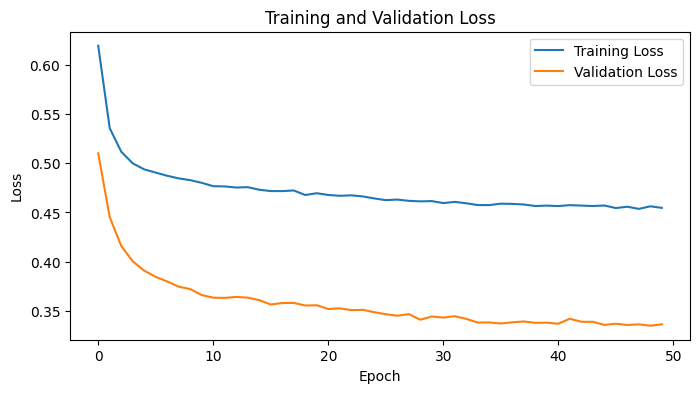

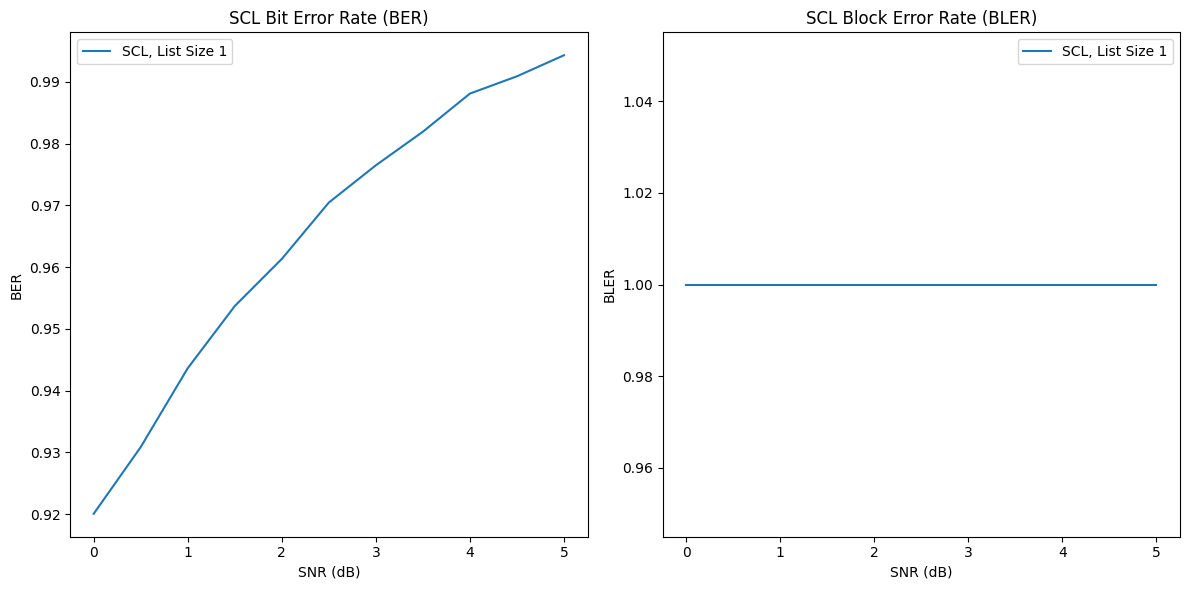

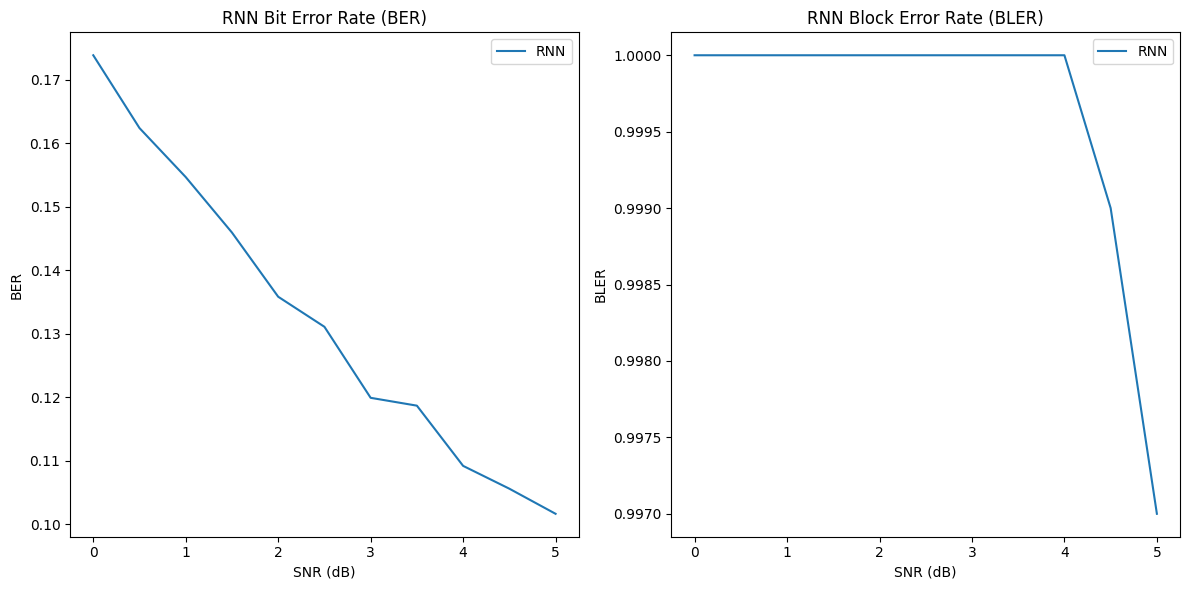

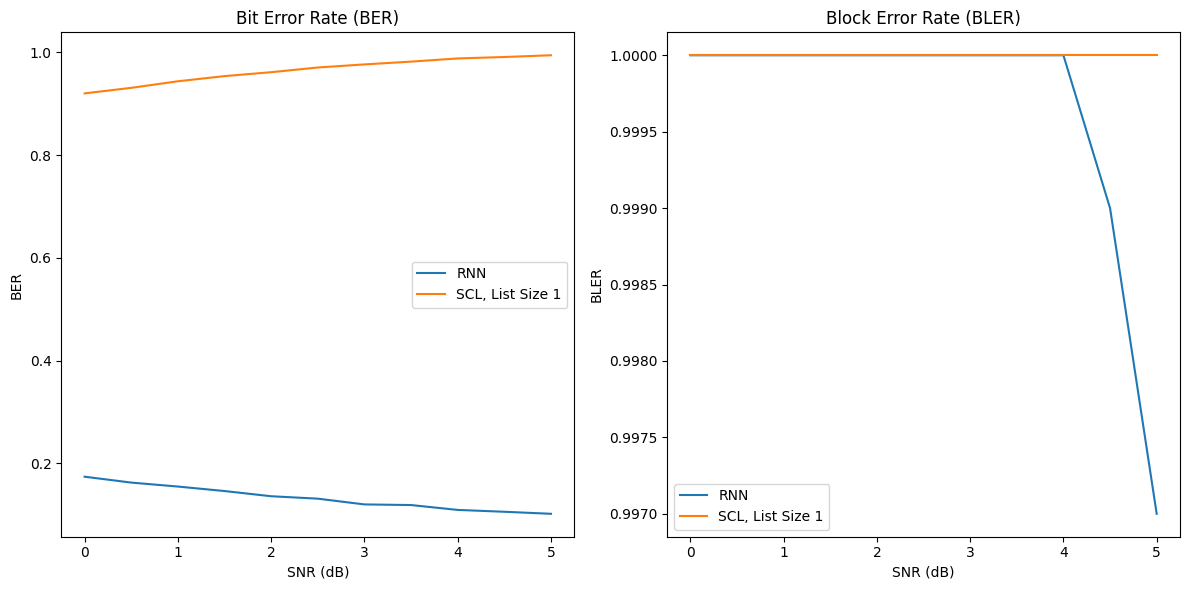

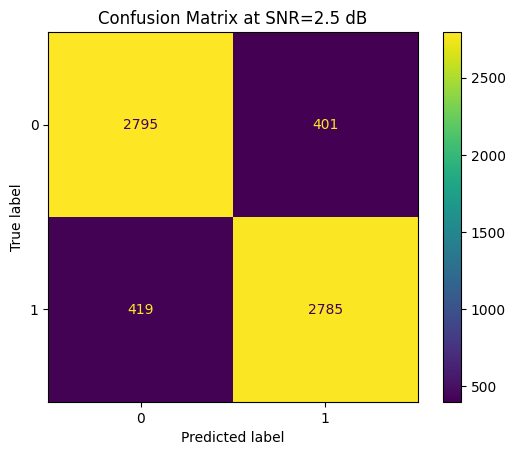